In [4]:
import numpy as np
from opendrift.readers import reader_ROMS_native
from opendrift.models.oceandrift import OceanDrift

import numpy as np
from opendrift.readers import reader_ROMS_native
from opendrift.models.oceandrift import OceanDrift
import datetime as dt
import xarray as xr

o = OceanDrift(loglevel=20)  # Set loglevel to 0 for debug information

#%%
# Creating and adding reader for Nordic 4km current dataset
# nordic_native = reader_ROMS_native.Reader(o.test_data_folder() +
#     '2Feb2016_Nordic_sigma_3d/Nordic-4km_SLEVELS_avg_00_subset2Feb2016.nc')
# o.add_reader(nordic_native)

# LiveOcean Example
#netCDFs = '/import/c1/VERTMIX/jgpender/coawst/PTOWN_500m/InputFiles/perigeeData/HIS*.nc'
#grid = '/import/c1/VERTMIX/jgpender/coawst/PTOWN_500m/InputFiles/perigeeData/CAS7_grid.nc'

# Dabob 100m Example

# AdmInlet 500mexample
netCDFs = '/import/c1/VERTMIX/jgpender/coawst/PTOWN_500m/Experiments/PTOWN_500m_2016_307_mesoNoTides/netcdfOutput/*.nc'
grid = '/import/c1/VERTMIX/jgpender/coawst/PTOWN_500m/Experiments/PTOWN_500m_2016_307_mesoNoTides/PTOWN_500m.nc'

# Hood Canal Example
#hc_grid_ds = xr.open_dataset('/import/c1/VERTMIX/jgpender/coawst/HC_100m_30layers/Experiments/HC_100m_2024.02.29/HC_100mME_wetDry.nc')
#hc_ds = xr.open_dataset('/import/c1/VERTMIX/jgpender/coawst/HC_100m_30layers/Experiments/HC_100m_2024.02.29/netcdfOutput/hc_his_00062.nc')

netCDFs = '/import/c1/VERTMIX/jgpender/coawst/HC_100m_30layers/Experiments/HC_100m_2024.02.29/netcdfOutput/hc_his_00062.nc'
grid = '/import/c1/VERTMIX/jgpender/coawst/HC_100m_30layers/Experiments/HC_100m_2024.02.29/HC_100mME_wetDry.nc'


# dabob_native = reader_ROMS_native.Reader(f'{netCDFs}', 
#                                         gridfile=grid)

#dabob_native = reader_ROMS_native.Reader(f'{netCDFs}', 
#                                        gridfile=grid)

#o.add_reader('https://nanoos.ceoas.oregonstate.edu/thredds/dodsC/NANOOS/LiveOcean')

o.add_readers_from_list(['https://nanoos.ceoas.oregonstate.edu/thredds/dodsC/NANOOS/LiveOcean'])


#%%
# Seed elements at defined positions, depth and time
# o.seed_elements(lon=12.0, lat=68.3, radius=0, number=10,
#                 z=np.linspace(0, -150, 10), time=nordic_native.start_time)

# o.seed_elements(lon=134.1, lat=7, radius=100, number=1000,
#                 z=np.linspace(0, -350, 1000), time=nordic_native.start_time)

# o.seed_elements(lon=237.141, lat=47.69555, radius=100, number=10,
#                 z=np.linspace(0, -150, 10), time=dabob_native.start_time)

number_seeds = 10

# o.seed_elements(lon=237.373,
#                 lat=47.97555, 
#                 radius=100, 
#                 number=number_seeds,
#                 z=np.linspace(0, -150, number_seeds), 
#                 time=dabob_native.start_time,
#                 )

o.seed_elements(lon=237.141, 
                lat=47.69555, 
                radius=100, 
                number=10,
                z=np.linspace(0, -150, 10), 
                time=dt.datetime(2024, 2, 28, 0, 0)
               )


#%%
# Running model
run_length = dt.timedelta(hours=10)
o.run(time_step=3600,
      outfile='opendrift_test.nc',
     #end_time=dt.datetime(2016, 11, 10, 0, 0)
     )

#%%
# Print and plot results, with lines colored by particle depth
print(o)
o.plot(linecolor='z', fast=True)
#o.animation()

08:42:47 INFO    opendrift.models.basemodel:528: OpenDriftSimulation initialised (version 1.11.1 / v1.11.1-26-gc27e2f6)
08:42:47 INFO    opendrift.models.basemodel.environment:220: Adding a dynamical landmask with max. priority based on assumed maximum speed of 1.0 m/s. Adding a customised landmask may be faster...
08:42:52 INFO    opendrift.models.basemodel.environment:247: Fallback values will be used for the following variables which have no readers: 
08:42:52 INFO    opendrift.models.basemodel.environment:250: 	x_sea_water_velocity: 0.000000
08:42:52 INFO    opendrift.models.basemodel.environment:250: 	y_sea_water_velocity: 0.000000
08:42:52 INFO    opendrift.models.basemodel.environment:250: 	x_wind: 0.000000
08:42:52 INFO    opendrift.models.basemodel.environment:250: 	y_wind: 0.000000
08:42:52 INFO    opendrift.models.basemodel.environment:250: 	upward_sea_water_velocity: 0.000000
08:42:52 INFO    opendrift.models.basemodel.environment:250: 	ocean_vertical_diffusivity: 0.000000


Could not open https://nanoos.ceoas.oregonstate.edu/thredds/dodsC/NANOOS/LiveOcean with reader_netCDF_CF_generic
Could not open https://nanoos.ceoas.oregonstate.edu/thredds/dodsC/NANOOS/LiveOcean with reader_ROMS_native


08:42:53 INFO    opendrift.readers.reader_grib:77: Opening dataset: https://nanoos.ceoas.oregonstate.edu/thredds/dodsC/NANOOS/LiveOcean


Could not open https://nanoos.ceoas.oregonstate.edu/thredds/dodsC/NANOOS/LiveOcean with reader_grib


ValueError: Reader could not be initialised

In [6]:
### USING LIVEOCEAN MODEL
### native ROMS output not working here, trying CF compliant 

import numpy as np
from opendrift.readers import reader_ROMS_native
from opendrift.models.oceandrift import OceanDrift

import numpy as np
from opendrift.readers import reader_ROMS_native, reader_netCDF_CF_generic
from opendrift.models.oceandrift import OceanDrift
import datetime as dt

o = OceanDrift(loglevel=20)  # Set loglevel to 0 for debug information

#%%
# Creating and adding reader for Nordic 4km current dataset
# nordic_native = reader_ROMS_native.Reader(o.test_data_folder() +
#     '2Feb2016_Nordic_sigma_3d/Nordic-4km_SLEVELS_avg_00_subset2Feb2016.nc')
# o.add_reader(nordic_native)

# LiveOcean Example
netCDFs = '/import/c1/VERTMIX/jgpender/coawst/PTOWN_500m/InputFiles/perigeeData/HIS_2016.11.26.nc'
grid = '/import/c1/VERTMIX/jgpender/coawst/PTOWN_500m/InputFiles/perigeeData/CAS7_grid.nc'

# Dabob 100m Example

# AdmInlet 500mexample
#netCDFs = '/import/c1/VERTMIX/jgpender/coawst/PTOWN_500m/Experiments/PTOWN_500m_2016_307_mesoNoTides/netcdfOutput'
#grid = '/import/c1/VERTMIX/jgpender/coawst/PTOWN_500m/Experiments/PTOWN_500m_2016_307_mesoNoTides/PTOWN_500m.nc'

# dabob_native = reader_ROMS_native.Reader(f'{netCDFs}', 
#                                         gridfile=grid)

lo_native = reader_ROMS_native.Reader(f'{netCDFs}', gridfile=grid,)

o.add_reader(lo_native)

#%%
# Seed elements at defined positions, depth and time
# o.seed_elements(lon=12.0, lat=68.3, radius=0, number=10,
#                 z=np.linspace(0, -150, 10), time=nordic_native.start_time)

# o.seed_elements(lon=134.1, lat=7, radius=100, number=1000,
#                 z=np.linspace(0, -350, 1000), time=nordic_native.start_time)

# o.seed_elements(lon=237.141, lat=47.69555, radius=100, number=10,
#                 z=np.linspace(0, -150, 10), time=dabob_native.start_time)

number_seeds = 10

o.seed_elements(lon=237.373, 
                lat=47.97555, 
                radius=100, 
                number=number_seeds,
                z=np.linspace(0, -150, number_seeds), 
                time=lo_native.start_time,
                )
#%%
# Running model
run_length = dt.timedelta(hours=10)
o.run(time_step=3600,
      outfile='opendrift_test.nc',
     #end_time=dt.datetime(2016, 11, 10, 0, 0)
     )

#%%
# Print and plot results, with lines colored by particle depth
print(o)
o.plot(linecolor='z', fast=True)
#o.animation()
    

11:17:06 INFO    opendrift.models.basemodel:528: OpenDriftSimulation initialised (version 1.11.1 / v1.11.1-26-gc27e2f6)
11:17:06 INFO    opendrift.readers.reader_ROMS_native:148: Opening dataset: /import/c1/VERTMIX/jgpender/coawst/PTOWN_500m/InputFiles/perigeeData/HIS_2016.11.26.nc
11:17:06 INFO    opendrift.readers.reader_ROMS_native:165: Opening file with Dataset


MergeError: conflicting values for variable 'h' on objects to be combined. You can skip this check by specifying compat='override'.

In [5]:
lo_native.ROMS_variable_mapping

{'h': 'sea_floor_depth_below_sea_level',
 'zeta': 'sea_surface_height',
 'u': 'x_sea_water_velocity',
 'v': 'y_sea_water_velocity',
 'temp': 'sea_water_temperature',
 'salt': 'sea_water_salinity',
 'lat_rho': 'grid_latitude_at_cell_center',
 'lat_u': 'grid_latitude_at_cell_y_edges',
 'lat_v': 'grid_latitude_at_cell_x_edges',
 'lon_rho': 'grid_longitude_at_cell_center',
 'lon_u': 'grid_longitude_at_cell_y_edges',
 'lon_v': 'grid_longitude_at_cell_x_edges',
 'ocean_time': 'time',
 's_rho': 'ocean_s_coordinate_g2',
 'ubar': 'barotropic_sea_water_x_velocity',
 'vbar': 'barotropic_sea_water_y_velocity'}

10:59:09 INFO    opendrift.models.basemodel:528: OpenDriftSimulation initialised (version 1.11.1 / v1.11.1-26-gc27e2f6)
10:59:09 INFO    opendrift.readers.reader_ROMS_native:148: Opening dataset: /import/c1/VERTMIX/jgpender/coawst/HC_100m_30layers/Experiments/HC_100m_2022.03.07/netcdfOutput/hc_his_00066.nc
10:59:09 INFO    opendrift.readers.reader_ROMS_native:165: Opening file with Dataset
10:59:09 INFO    opendrift.readers.reader_ROMS_native:246: Read GLS parameters from file.
10:59:09 WARNING opendrift.readers.basereader.structured:50: No proj string or projection could be derived, using 'fakeproj'. This assumes that the variables are structured and gridded approximately equidistantly on the surface (i.e. in meters). This must be guaranteed by the user. You can get rid of this warning by supplying a valid projection to the reader.
10:59:09 INFO    opendrift.readers.basereader.structured:90: Making interpolator for lon,lat to x,y conversion...
10:59:20 INFO    opendrift.models.basemod

--------------------
Reader performance:
--------------------
global_landmask
 0:00:00.0  total
 0:00:00.0  preparing
 0:00:00.0  reading
 0:00:00.0  masking
--------------------
Performance:
   12.2 total time
   10.5 configuration
    0.0 preparing main loop
      0.0 moving elements to ocean
    1.6 main loop
      0.0 updating elements
    0.0 cleaning up
--------------------
Model:	OceanDrift     (OpenDrift version 1.11.1)
	10 active Lagrangian3DArray particles  (0 deactivated, 0 scheduled)
-------------------
Environment variables:
  -----
  land_binary_mask
     1) global_landmask
  -----
Readers not added for the following variables:
  ocean_mixed_layer_thickness
  ocean_vertical_diffusivity
  sea_floor_depth_below_sea_level
  sea_surface_swell_wave_peak_period_from_variance_spectral_density
  sea_surface_swell_wave_significant_height
  sea_surface_swell_wave_to_direction
  sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment
  sea_surface_wave_pe

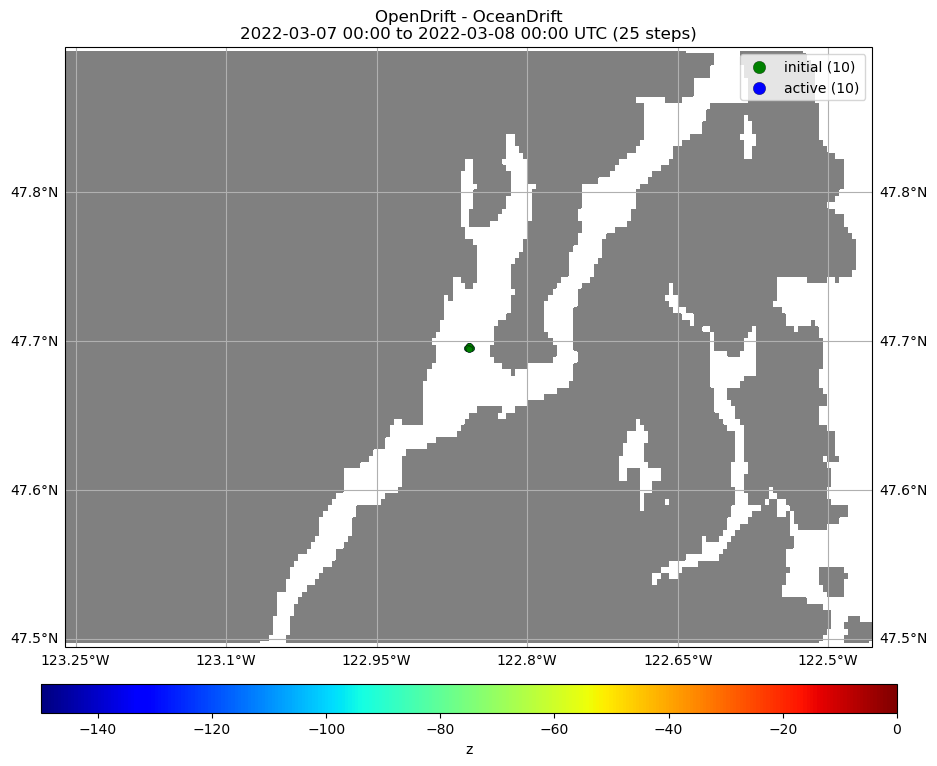

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2022-03-07 00:00 to 2022-03-08 00:00 UTC (25 steps)'}>,
 <Figure size 1100x817.102 with 2 Axes>)

In [14]:
### USING HOOD CANAL 100m MODEL
### 

import numpy as np
from opendrift.readers import reader_ROMS_native
from opendrift.models.oceandrift import OceanDrift

import numpy as np
from opendrift.readers import reader_ROMS_native, reader_netCDF_CF_generic
from opendrift.models.oceandrift import OceanDrift
import datetime as dt

o = OceanDrift(loglevel=20)  # Set loglevel to 0 for debug information

#%%
# Creating and adding reader for Nordic 4km current dataset
# nordic_native = reader_ROMS_native.Reader(o.test_data_folder() +
#     '2Feb2016_Nordic_sigma_3d/Nordic-4km_SLEVELS_avg_00_subset2Feb2016.nc')
# o.add_reader(nordic_native)

# LiveOcean Example
netCDFs = '/import/c1/VERTMIX/jgpender/coawst/HC_100m_30layers/Experiments/HC_100m_2022.03.07/netcdfOutput/hc_his_00066.nc'
grid100 = '/import/c1/VERTMIX/jgpender/coawst/HC_100m_30layers/Experiments/HC_100m_2022.03.07/HC_100mME_wetDry.nc'

# Dabob 100m Example

# AdmInlet 500mexample
#netCDFs = '/import/c1/VERTMIX/jgpender/coawst/PTOWN_500m/Experiments/PTOWN_500m_2016_307_mesoNoTides/netcdfOutput'
#grid = '/import/c1/VERTMIX/jgpender/coawst/PTOWN_500m/Experiments/PTOWN_500m_2016_307_mesoNoTides/PTOWN_500m.nc'

# dabob_native = reader_ROMS_native.Reader(f'{netCDFs}', 
#                                         gridfile=grid)

hc2_native = reader_ROMS_native.Reader(f'{netCDFs}', gridfile=grid100,)#compat='override')
#dabob_native =  reader_netCDF_CF_generic.Reader(f'{netCDFs}')                                    

o.add_reader(hc2_native)

#%%
# Seed elements at defined positions, depth and time
# o.seed_elements(lon=12.0, lat=68.3, radius=0, number=10,
#                 z=np.linspace(0, -150, 10), time=nordic_native.start_time)

# o.seed_elements(lon=134.1, lat=7, radius=100, number=1000,
#                 z=np.linspace(0, -350, 1000), time=nordic_native.start_time)

# o.seed_elements(lon=237.141, lat=47.69555, radius=100, number=10,
#                 z=np.linspace(0, -150, 10), time=dabob_native.start_time)

number_seeds = 10

o.seed_elements(lon=237.141, lat=47.69555, 
                radius=100, 
                number=number_seeds,
                z=np.linspace(0, -150, number_seeds), 
                time=hc2_native.start_time,
                )
#%%
# Running model
run_length = dt.timedelta(hours=10)
o.run(time_step=3600,
      outfile='opendrift_test.nc',
     #end_time=dt.datetime(2016, 11, 10, 0, 0)
     )

#%%
# Print and plot results, with lines colored by particle depth
print(o)
o.plot(linecolor='z', fast=True)
#o.animation()
    

In [15]:
lo_ds = xr.open_dataset('/import/c1/VERTMIX/jgpender/coawst/PTOWN_500m/InputFiles/perigeeData/HIS_2016.11.01.nc')
lo_grid = xr.open_dataset('/import/c1/VERTMIX/jgpender/coawst/PTOWN_500m/InputFiles/perigeeData/CAS7_grid.nc')
adm_ds = xr.open_dataset('/import/c1/VERTMIX/jgpender/coawst/PTOWN_500m/Experiments/PTOWN_500m_2016_307_mesoNoTides/netcdfOutput/ptown_his_00023.nc')
adm_grid_ds = xr.open_dataset('/import/c1/VERTMIX/jgpender/coawst/PTOWN_500m/Experiments/PTOWN_500m_2016_307_mesoNoTides/PTOWN_500m.nc')

hc_grid_ds = xr.open_dataset('/import/c1/VERTMIX/jgpender/coawst/HC_100m_30layers/Experiments/HC_100m_2022.03.07/HC_100mME_wetDry.nc')
hc_ds = xr.open_dataset('/import/c1/VERTMIX/jgpender/coawst/HC_100m_30layers/Experiments/HC_100m_2022.03.07/netcdfOutput/hc_his_00066.nc')

In [16]:
lo_ds

<xarray.Dataset> Size: 2GB
Dimensions:     (s_rho: 30, eta_rho: 411, xi_rho: 401, eta_u: 411, xi_u: 400,
                 eta_v: 410, xi_v: 401, ocean_time: 24)
Coordinates:
    lat_rho     (eta_rho, xi_rho) float64 1MB ...
    lat_u       (eta_u, xi_u) float64 1MB ...
    lat_v       (eta_v, xi_v) float64 1MB ...
    lon_rho     (eta_rho, xi_rho) float64 1MB ...
    lon_u       (eta_u, xi_u) float64 1MB ...
    lon_v       (eta_v, xi_v) float64 1MB ...
  * ocean_time  (ocean_time) datetime64[ns] 192B 2016-11-01T01:00:00 ... 2016...
  * s_rho       (s_rho) float64 240B -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
Dimensions without coordinates: eta_rho, xi_rho, eta_u, xi_u, eta_v, xi_v
Data variables:
    Cs_r        (s_rho) float64 240B ...
    h           (eta_rho, xi_rho) float64 1MB ...
    hc          float64 8B ...
    salt        (ocean_time, s_rho, eta_rho, xi_rho) float32 475MB ...
    temp        (ocean_time, s_rho, eta_rho, xi_rho) float32 475MB ...
    u           (ocean_time, s_rho, eta_u, xi_u) float32 473MB ...
    ubar        (ocean_time, eta_u, xi_u) float32 16MB ...
    v           (ocean_time, s_rho, eta_v, xi_v) float32 474MB ...
    vbar        (ocean_time, eta_v, xi_v) float32 16MB ...
    zeta        (ocean_time, eta_rho, xi_rho) float32 16MB ...
Attributes: (12/46)
    file:                      /mmfs1/gscratch/macc/parker/LO_roms/cas7_t0_x4...
    format:                    netCDF-4/HDF5 file
    Conventions:               CF-1.4, SGRID-0.3
    type:                      ROMS/TOMS history file
    title:                     LiveOcean input file
    var_info:                  /mmfs1/gscratch/macc/parker/LO_roms_source_git...
    ...                        ...
    ana_file:                  ROMS/Functionals/ana_btflux.h, ROMS/Functional...
    CPP_options:               X4B, ADD_FSOBC, ADD_M2OBC, ANA_BPFLUX, ANA_BSF...
    bio_file:                  /gscratch/macc/parker/LO_roms_user/x4b/fennel.h
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...
    nco_openmp_thread_number:  1
    history:                   Sat Feb 24 17:42:56 2024: ncatted -O -a units,...

In [17]:
adm_ds

<xarray.Dataset> Size: 82MB
Dimensions:         (tracer: 2, boundary: 4, s_rho: 30, s_w: 31, ocean_time: 8,
                     eta_u: 59, xi_u: 118, eta_v: 58, xi_v: 119, eta_rho: 59,
                     xi_rho: 119)
Coordinates:
  * s_rho           (s_rho) float64 240B -0.9833 -0.95 ... -0.05 -0.01667
  * s_w             (s_w) float64 248B -1.0 -0.9667 -0.9333 ... -0.03333 0.0
  * ocean_time      (ocean_time) datetime64[ns] 64B 2016-11-24T03:00:00 ... 2...
Dimensions without coordinates: tracer, boundary, eta_u, xi_u, eta_v, xi_v,
                                eta_rho, xi_rho
Data variables: (12/88)
    ntimes          int32 4B ...
    ndtfast         int32 4B ...
    dt              float64 8B ...
    dtfast          float64 8B ...
    dstart          datetime64[ns] 8B ...
    nHIS            int32 4B ...
    ...              ...
    salt            (ocean_time, s_rho, eta_rho, xi_rho) float32 7MB ...
    AKv             (ocean_time, s_w, eta_rho, xi_rho) float32 7MB ...
    AKt             (ocean_time, s_w, eta_rho, xi_rho) float32 7MB ...
    AKs             (ocean_time, s_w, eta_rho, xi_rho) float32 7MB ...
    tke             (ocean_time, s_w, eta_rho, xi_rho) float32 7MB ...
    gls             (ocean_time, s_w, eta_rho, xi_rho) float32 7MB ...
Attributes: (12/37)
    file:              ./netcdfOutput/ptown_his_00023.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             PTOWN - 500m
    var_info:          ../../../ROMS/varinfo_LOCAL.dat
    ...                ...
    compiler_command:  /opt/scyld/openmpi/1.10.7/intel/bin/mpif90
    compiler_flags:    -fp-model precise -ip -O3 -traceback -check uninit
    tiling:            002x002
    history:           ROMS/TOMS, Version 3.9, Saturday - March 2, 2024 - 11:...
    ana_file:          ROMS/Functionals/ana_btflux.h
    CPP_options:       PTOWN, ANA_BSFLUX, ANA_BTFLUX, ASSUMED_SHAPE, !BOUNDAR...

In [18]:
hc_ds

<xarray.Dataset> Size: 11GB
Dimensions:          (tracer: 2, boundary: 4, s_rho: 30, s_w: 31,
                      ocean_time: 25, eta_psi: 661, xi_psi: 470, eta_rho: 662,
                      xi_rho: 471, eta_u: 662, xi_u: 470, eta_v: 661, xi_v: 471)
Coordinates:
  * s_rho            (s_rho) float64 240B -0.9833 -0.95 ... -0.05 -0.01667
  * s_w              (s_w) float64 248B -1.0 -0.9667 -0.9333 ... -0.03333 0.0
  * ocean_time       (ocean_time) datetime64[ns] 200B 2022-03-07 ... 2022-03-08
Dimensions without coordinates: tracer, boundary, eta_psi, xi_psi, eta_rho,
                                xi_rho, eta_u, xi_u, eta_v, xi_v
Data variables: (12/96)
    ntimes           int32 4B ...
    ndtfast          int32 4B ...
    dt               float64 8B ...
    dtfast           float64 8B ...
    dstart           datetime64[ns] 8B ...
    nHIS             int32 4B ...
    ...               ...
    omega            (ocean_time, s_w, eta_rho, xi_rho) float32 967MB ...
    temp             (ocean_time, s_rho, eta_rho, xi_rho) float32 935MB ...
    salt             (ocean_time, s_rho, eta_rho, xi_rho) float32 935MB ...
    AKv              (ocean_time, s_w, eta_rho, xi_rho) float32 967MB ...
    tke              (ocean_time, s_w, eta_rho, xi_rho) float32 967MB ...
    gls              (ocean_time, s_w, eta_rho, xi_rho) float32 967MB ...
Attributes: (12/37)
    file:              ./netcdfOutput/hc_his_00066.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             HC - 100m
    var_info:          ../../../ROMS/varinfo_LOCAL.dat
    ...                ...
    compiler_command:  /opt/scyld/openmpi/1.10.7/intel/bin/mpif90
    compiler_flags:    -fp-model precise -ip -O3 -traceback -check uninit
    tiling:            012x014
    history:           ROMS/TOMS, Version 3.8, Thursday - August 24, 2023 -  ...
    ana_file:          ROMS/Functionals/ana_btflux.h
    CPP_options:       HC, ALBEDO_CSIM, ALBEDO_CURVE, ANA_BSFLUX, ANA_BTFLUX,...

In [20]:
hc_ds['mask_rho'] = hc_ds['wetdry_mask_rho'] * 1

In [24]:
### USING HOOD CANAL 100m MODEL
### 

import numpy as np
from opendrift.readers import reader_ROMS_native
from opendrift.models.oceandrift import OceanDrift

import numpy as np
from opendrift.readers import reader_ROMS_native, reader_netCDF_CF_generic
from opendrift.models.oceandrift import OceanDrift
import datetime as dt

o = OceanDrift(loglevel=20)  # Set loglevel to 0 for debug information

#%%
# Creating and adding reader for Nordic 4km current dataset
# nordic_native = reader_ROMS_native.Reader(o.test_data_folder() +
#     '2Feb2016_Nordic_sigma_3d/Nordic-4km_SLEVELS_avg_00_subset2Feb2016.nc')
# o.add_reader(nordic_native)

# LiveOcean Example
netCDFs = '/import/c1/VERTMIX/jgpender/coawst/HC_100m_30layers/Experiments/HC_100m_2022.03.07/netcdfOutput/hc_his_00066.nc'
grid100 = '/import/c1/VERTMIX/jgpender/coawst/HC_100m_30layers/Experiments/HC_100m_2022.03.07/HC_100mME_wetDry.nc'

# Dabob 100m Example

# AdmInlet 500mexample
#netCDFs = '/import/c1/VERTMIX/jgpender/coawst/PTOWN_500m/Experiments/PTOWN_500m_2016_307_mesoNoTides/netcdfOutput'
#grid = '/import/c1/VERTMIX/jgpender/coawst/PTOWN_500m/Experiments/PTOWN_500m_2016_307_mesoNoTides/PTOWN_500m.nc'

# dabob_native = reader_ROMS_native.Reader(f'{netCDFs}', 
#                                         gridfile=grid)

hc2_native = reader_ROMS_native.Reader(f'{netCDFs}', 
                                        gridfile=grid)
#dabob_native =  reader_netCDF_CF_generic.Reader(f'{netCDFs}')                                    

o.add_reader(hc2_native)

#%%
# Seed elements at defined positions, depth and time
# o.seed_elements(lon=12.0, lat=68.3, radius=0, number=10,
#                 z=np.linspace(0, -150, 10), time=nordic_native.start_time)

# o.seed_elements(lon=134.1, lat=7, radius=100, number=1000,
#                 z=np.linspace(0, -350, 1000), time=nordic_native.start_time)

# o.seed_elements(lon=237.141, lat=47.69555, radius=100, number=10,
#                 z=np.linspace(0, -150, 10), time=dabob_native.start_time)

number_seeds = 10

o.seed_elements(lon=237.141, lat=47.69555, 
                radius=100, 
                number=number_seeds,
                z=np.linspace(0, -150, number_seeds), 
                time=hc2_native.start_time,
                )
#%%
# Running model
run_length = dt.timedelta(hours=10)
o.run(time_step=3600,
      outfile='opendrift_test.nc',
     #end_time=dt.datetime(2016, 11, 10, 0, 0)
     )

#%%
# Print and plot results, with lines colored by particle depth
print(o)
o.plot(linecolor='z', fast=True)
#o.animation()
    

11:10:28 INFO    opendrift.models.basemodel:528: OpenDriftSimulation initialised (version 1.11.1 / v1.11.1-26-gc27e2f6)
11:10:29 INFO    opendrift.readers.reader_ROMS_native:148: Opening dataset: /import/c1/VERTMIX/jgpender/coawst/HC_100m_30layers/Experiments/HC_100m_2022.03.07/netcdfOutput/hc_his_00066.nc
11:10:29 INFO    opendrift.readers.reader_ROMS_native:165: Opening file with Dataset


ValueError: cannot reindex or align along dimension 'eta_psi' because of conflicting dimension sizes: {410, 661}

In [23]:
hc_native

NameError: name 'hc_native' is not defined